### Preparacion de datos

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [47]:
df_train = pd.read_csv('E:/datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
df_test = pd.read_csv('E:/datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
df_full = pd.read_csv('E:/datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')

In [48]:
display(df_train.head(2))
display(df_test.head(2))
display(df_full.head(2))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [49]:
display(df_train.shape)
display(df_test.shape)
display(df_full.shape)

(16860, 86)

(5856, 52)

(22716, 86)

In [163]:
'''
columns = ['rougher.input.feed_au', 
           'rougher.output.tail_au', 
           'rougher.output.concentrate_au', 
           'primary_cleaner.output.tail_au', 
           'primary_cleaner.output.concentrate_au', 
           'secondary_cleaner.output.tail_au', 
           'final.output.tail_au', 
           'final.output.concentrate_au']
'''

"\ncolumns = ['rougher.input.feed_au', \n           'rougher.output.tail_au', \n           'rougher.output.concentrate_au', \n           'primary_cleaner.output.tail_au', \n           'primary_cleaner.output.concentrate_au', \n           'secondary_cleaner.output.tail_au', \n           'final.output.tail_au', \n           'final.output.concentrate_au']\n"

In [52]:
def recuperacion(c, f, t):

    recuperacion = ((c * (f - t)) / (f * (c - t))) * 100

    return recuperacion

c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

df_formula = df_train.copy()
df_formula['formula'] = recuperacion(c, f, t)

#MAE = mean_absolute_error(df_formula['rougher.output.recovery'].fillna(0), df_formula['formula'].fillna(0))
#print("MAE (formula vs rougher.output.recovery):", MAE)

In [53]:
MAE = df_formula['rougher.output.recovery'] - df_formula['formula']
MAE = MAE.abs().mean()
print("La diferencia entre el valor esperado y el valor medido es de", MAE)

La diferencia entre el valor esperado y el valor medido es de 9.303415616264301e-15


In [98]:
# El error absoluto medio es muy cercano a cero, lo que significa que no nos debemos preocupar por un sanity.

In [54]:
# Analisis de features no presentes en el set de prueba

col_train = df_train.columns.tolist()
col_test = df_test.columns.tolist()

features_not_in_test = []
for x in col_train:
    if x not in col_test:
        features_not_in_test.append(x)

print("Columnas que no están en el set de prueba:")  #
features_not_in_test

Columnas que no están en el set de prueba:


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [106]:
# Llenar valores nulos utilizando SimpleImputer

imp = SimpleImputer()

imp_df_train = pd.DataFrame(imp.fit_transform(df_train))
imp_df_train.columns = df_train.columns
imp_df_train.index = df_train.index

df_train_nulls = df_train.isnull().sum()
imp_df_train_nulls = imp_df_train.isnull().sum()

print((df_train_nulls > 0).sum())  # Valores nulos antes de usar simpleimputer 
print((imp_df_train_nulls > 0).sum())  # Valores nulos después de usar simpleimputer

imp_df_full = pd.DataFrame(imp.transform(df_full))
imp_df_full.columns = df_full.columns
imp_df_full.index = df_full.index

df_full_nulls = df_full.isnull().sum()
imp_df_full_nulls = imp_df_full.isnull().sum()

print((df_full_nulls > 0).sum())  # Valores nulos antes de usar simpleimputer 
print((imp_df_full_nulls > 0).sum())  # Valores nulos después de usar simpleimputer

imp_df_test = imp_df_full.loc[df_test.index, df_test.columns]

85
0
85
0


In [97]:
imp_df_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


### Analisis de datos

C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_39180\3909124911.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(
C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_39180\3909124911.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend()
C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_39180\3909124911.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(
C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_39180\3909124911.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend()
C:\Users\Rob

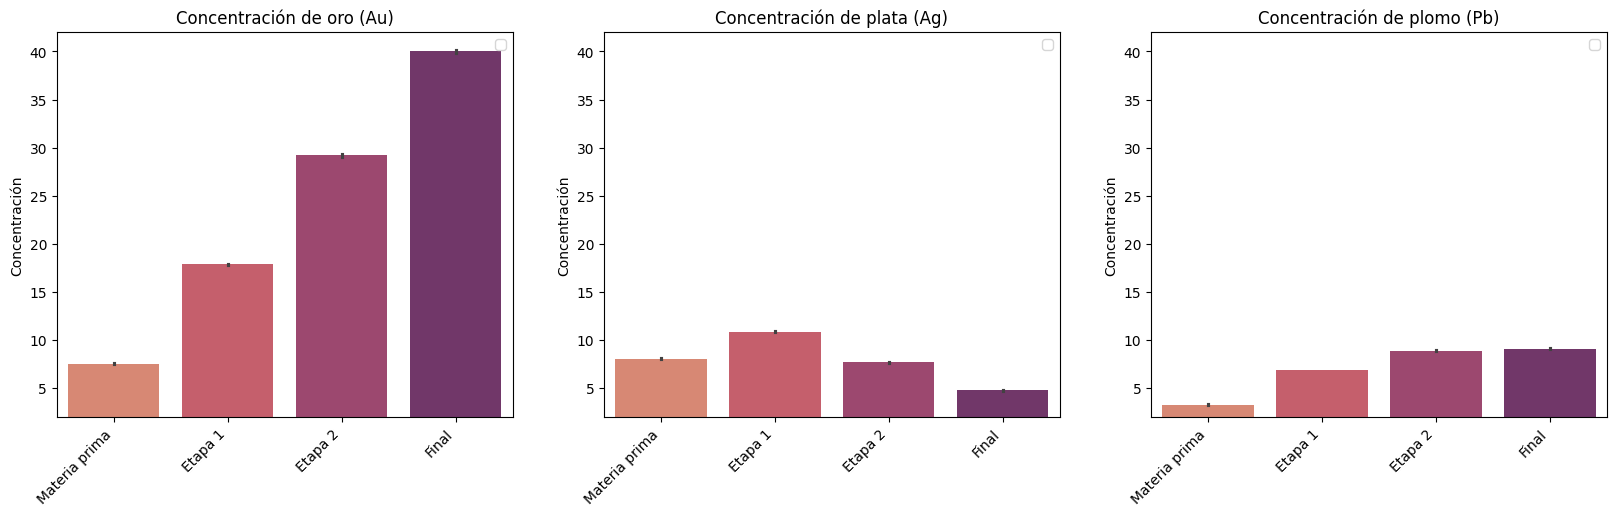

In [140]:
# Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación

au_concentracion = [
    "rougher.input.feed_au",
    "rougher.output.concentrate_au",
    "primary_cleaner.output.concentrate_au",
    "final.output.concentrate_au",
]
ag_concentracion = [
    "rougher.input.feed_ag",
    "rougher.output.concentrate_ag",
    "primary_cleaner.output.concentrate_ag",
    "final.output.concentrate_ag",
]
pb_concentracion = [
    "rougher.input.feed_pb",
    "rougher.output.concentrate_pb",
    "primary_cleaner.output.concentrate_pb",
    "final.output.concentrate_pb",
]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i in range(3):
    if i == 0:
        ax[i].set_title("Concentración de oro (Au)")
        ax[i].set_ylabel("Concentración")
        sns.barplot(data=imp_df_full[au_concentracion], ax=ax[i], palette="flare")
    elif i == 1:
        ax[i].set_title("Concentración de plata (Ag)")
        ax[i].set_ylabel("Concentración")
        sns.barplot(data=imp_df_full[ag_concentracion], ax=ax[i], palette="flare")
    else:
        ax[i].set_title("Concentración de plomo (Pb)")
        ax[i].set_ylabel("Concentración")
        sns.barplot(data=imp_df_full[pb_concentracion], ax=ax[i], palette="flare")
    ax[i].set_xticklabels(
        labels=["Materia prima", "Etapa 1", "Etapa 2", "Final"],
        rotation=45,
        ha="right",
    )
    ax[i].set_ylim(2, 42)
    ax[i].legend()

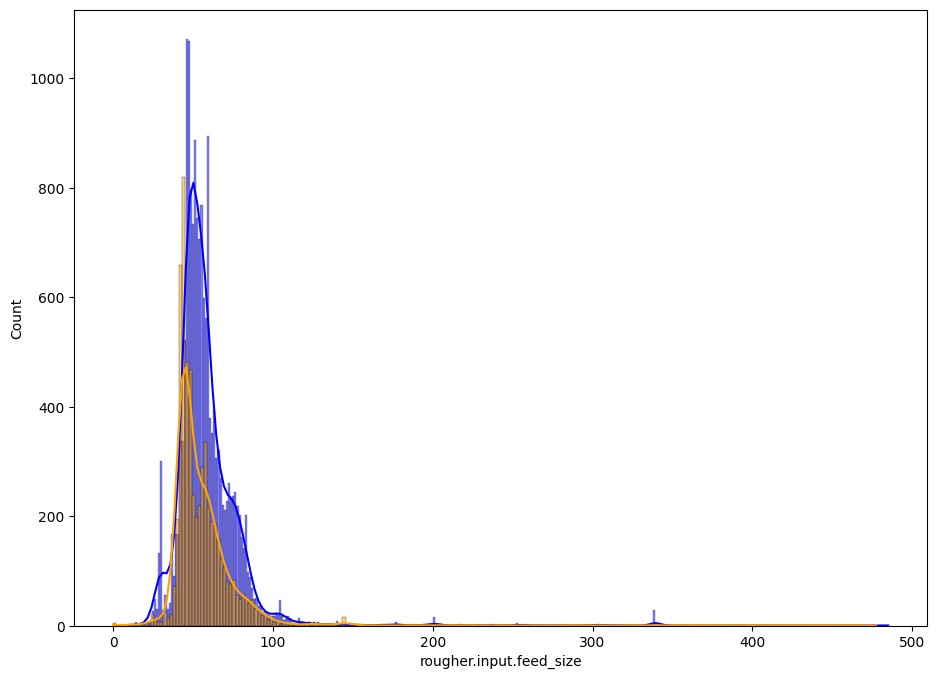

In [138]:
# Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.

data1 = imp_df_train["rougher.input.feed_size"]
data2 = imp_df_test["rougher.input.feed_size"]

plt.figure(figsize=(11, 8))

sns.histplot(data1, color="blue", label="Train", kde=True)
sns.histplot(data2, color="orange", label="Test", kde=True)

plt.show()


In [144]:
# Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final.

imp_df_full["total_feed_concentrate"] = imp_df_full[[
    "rougher.input.feed_au",
    "rougher.input.feed_ag",
    "rougher.input.feed_pb",
    "rougher.input.feed_sol"
]].sum(axis=1)

imp_df_full["total_rougher_concentrate"] = imp_df_full[[
    "rougher.output.concentrate_au",
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_sol"
]].sum(axis=1)

imp_df_full["total_final_concentrate"] = imp_df_full[[
    "final.output.concentrate_au",
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_sol"
]].sum(axis=1)

display(imp_df_full[[
    "total_feed_concentrate",
    "total_rougher_concentrate",
    "total_final_concentrate"]].head(2))

,total_feed_concentrate,total_rougher_concentrate,total_final_concentrate
date,,,
2016-01-15 00:00:00,51.680034,66.42495,63.644396
2016-01-15 01:00:00,50.659114,67.01271,63.957723


Text(0, 0.5, 'Frecuencia')

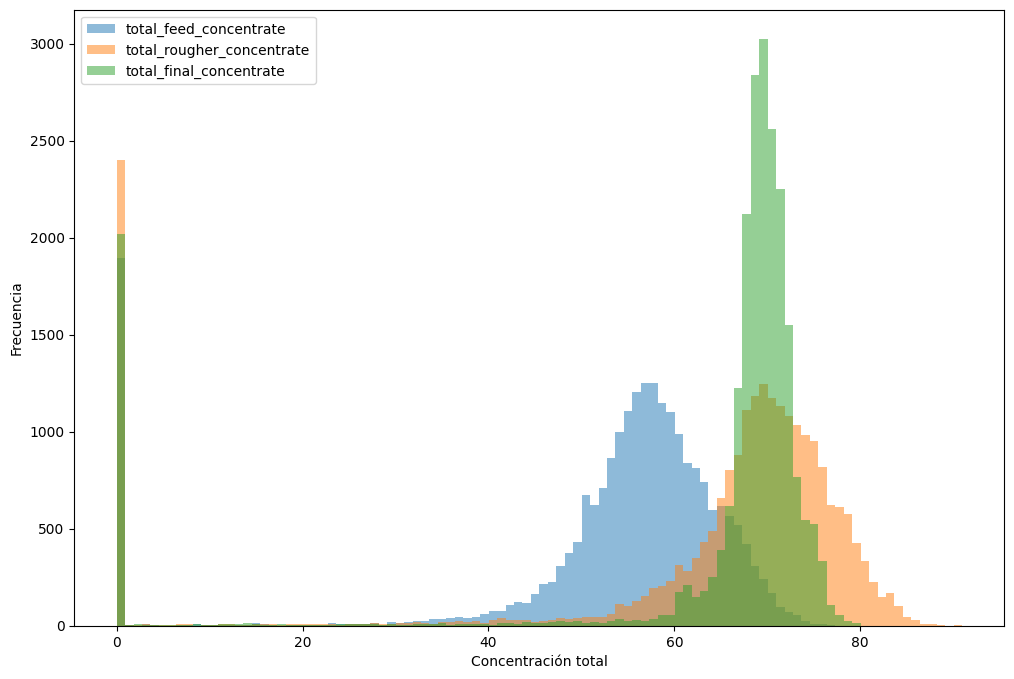

In [151]:
imp_df_full[[
    "total_feed_concentrate",
    "total_rougher_concentrate",
    "total_final_concentrate"]].plot(kind="hist", alpha=0.5, bins=100, figsize=(12, 8))

plt.xlabel("Concentración total")
plt.ylabel("Frecuencia")

In [ ]:
# Valores anómalos (concentración total igual a 0)

abnormal_values = imp_df_full[
    (imp_df_full["total_feed_concentrate"] == 0)
    | (imp_df_full["total_rougher_concentrate"] == 0)
    | (imp_df_full["total_final_concentrate"] == 0)
].index

In [160]:
imp_df_full = imp_df_full.drop(abnormal_values, inplace=True)

### Construye un modelo

In [161]:
# Escribe una función para calcular el valor final de sMAPE

def smape(y, y_pred):
    numerator = abs(y - y_pred)
    denominator = (abs(y) + abs(y_pred)) / 2
    fraction = numerator / denominator
    return fraction * 100 / len(y)

### Entrena diferentes modelos

In [167]:
columns = df_test.columns.to_list()

features_rougher = [x for x in columns if 'rougher' in x.split(".")]

features_rougher

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']